In [1]:
import os
import sys
#sys.path.insert(1, '../Src/')

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib import rcParams

rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] = 15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

PATH_DATA = '../Data/'

%matplotlib inline

In [3]:
fname = "stringer_orientations.npy"
fname =os.path.join(PATH_DATA,fname)

In [5]:
# @title Data loading
dat = np.load(fname, allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


dat has fields:
* `dat['sresp']`: neurons by stimuli, a.k.a. the neural response data (23589 by 4598)
* `dat['xyz']`: three-dimensional position of each neuron in the brain. 
* `dat['run']`: 1 by stimuli, a.k.a. the running speed of the animal in a.u.
* `dat['istim']`: 1 by stimuli, goes from 0 to 2*np.pi, the orientations shown on each trial
* `dat['u_spont']`: neurons by 128, the weights for the top 128 principal components of spontaneous activity. Unit norm.
* `dat['v_spont']`: 128 by 910, the timecourses for the top 128 PCs of spont activity.
* `dat['u_spont'] @ dat['v_spont']`: a reconstruction of the spontaneous activity for 910 timepoints interspersed throughout the recording.
* `dat['stat']`: 1 by neurons, some statistics for each neuron, see Suite2p for full documentation.


# Sresp Analysis

In [10]:
print(dat['sresp'].shape)
print(dat['sresp'][0][:5])


(23589, 4598)
[ 53.48326111  63.13476181  62.43212509 156.08782959 374.02896118]


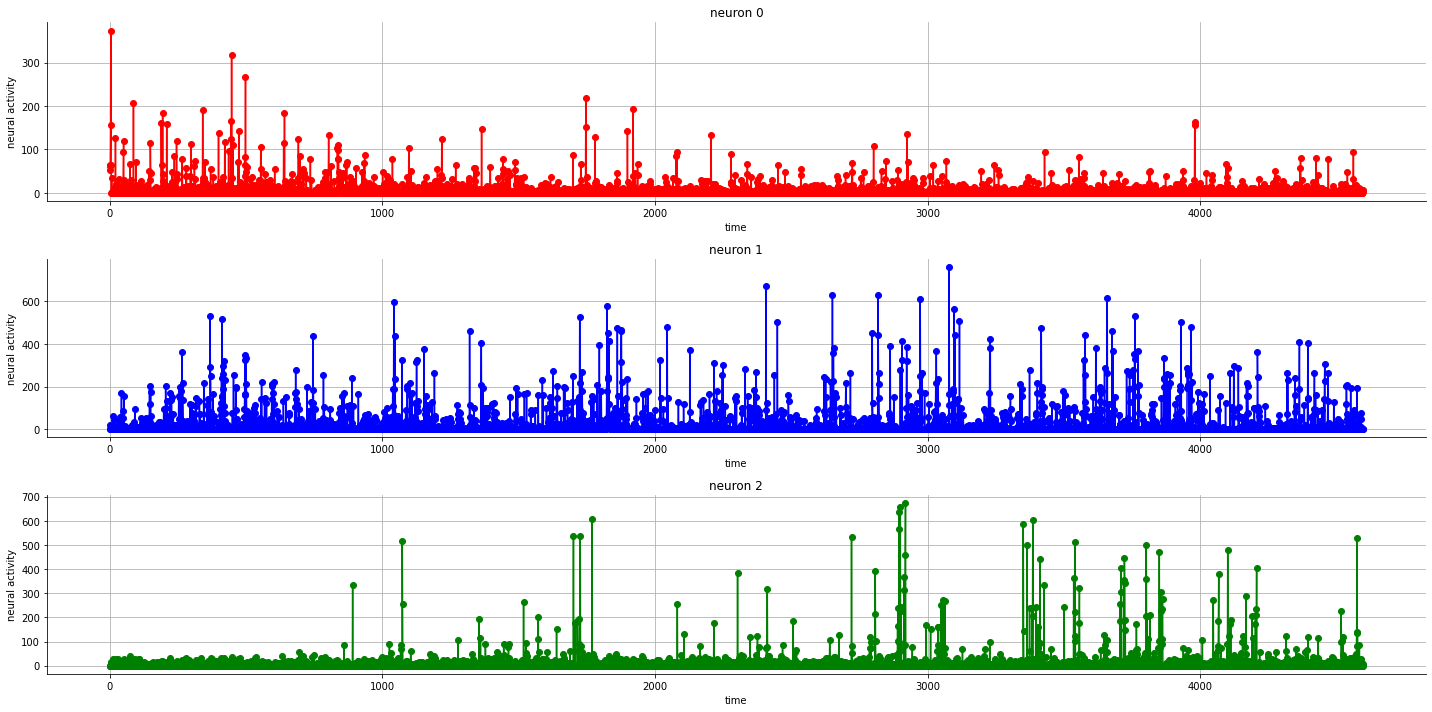

In [16]:
fig, axs = plt.subplots(3, 1,figsize=(20,10))
for idx,color in zip(range(3),['r','b','g']):
    axs[idx].plot(dat['sresp'][idx],'-'+color+'o')
    axs[idx].set_xlabel('time')
    axs[idx].set_ylabel('neural activity')
    axs[idx].set_title('neuron '+str(idx))
    axs[idx].grid(True)

In [86]:
%matplotlib inline

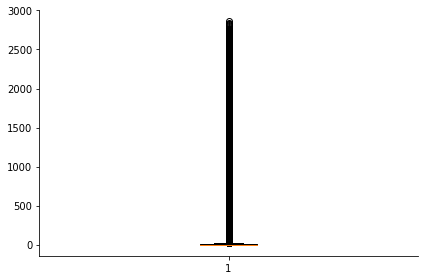

In [87]:
total_sresp = dat['sresp'].flatten()
fig = plt.boxplot(total_sresp)

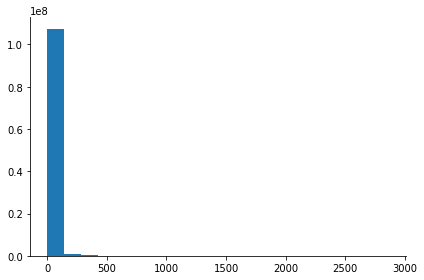

In [88]:
hist = plt.hist(total_sresp,bins=20)

In [90]:
for percentile in [25,50,75,90,100]:
    print('percentile'+str(percentile)+': ',np.percentile(total_sresp, percentile))


percentile25:  0.0
percentile50:  0.0
percentile75:  5.951487064361572
percentile90:  17.769683837890625
percentile100:  2864.7265625


In [38]:
maximum_reaction_idx = []
for idx in range(len(dat['sresp'])):
    if dat['sresp'][idx].max()>2600:
        print(idx)
        maximum_reaction_idx.append(idx)

16
92
1853
1921
5243
12521


In [40]:
maximum_reaction_idx

[16, 92, 1853, 1921, 5243, 12521]

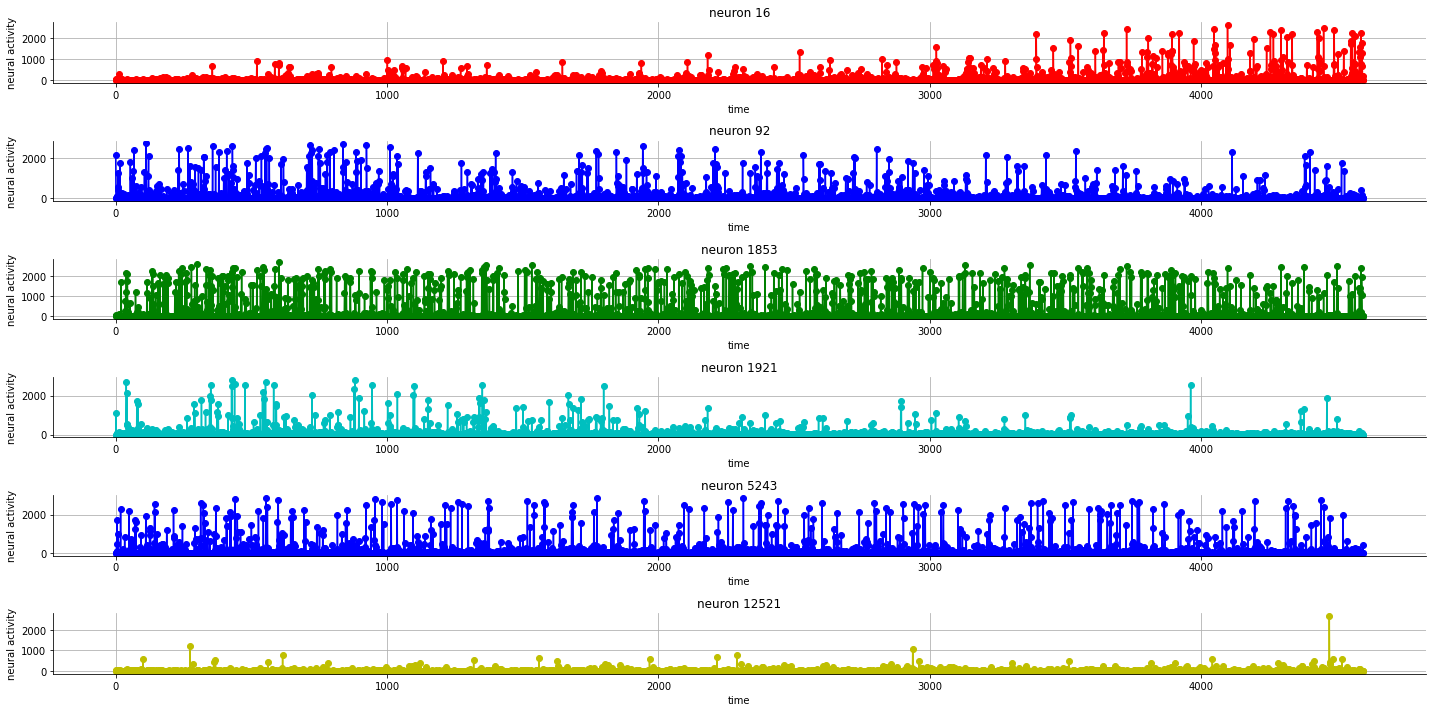

In [46]:
fig, axs = plt.subplots(6, 1,figsize=(20,10))
cnt = 0
for idx,color in zip([16, 92, 1853, 1921, 5243, 12521],['r','b','g','c','b','y']):
    axs[cnt].plot(dat['sresp'][idx],'-'+color+'o')
    axs[cnt].set_xlabel('time')
    axs[cnt].set_ylabel('neural activity')
    axs[cnt].set_title('neuron '+str(idx))
    axs[cnt].grid(True)
    cnt+=1

# istim

In [28]:
print(dat['istim'].shape)
print(dat['istim'][:5])


(4598,)
[2.62022653e+00 4.52593227e+00 7.18638172e-04 1.89961158e+00
 9.22094457e-01]


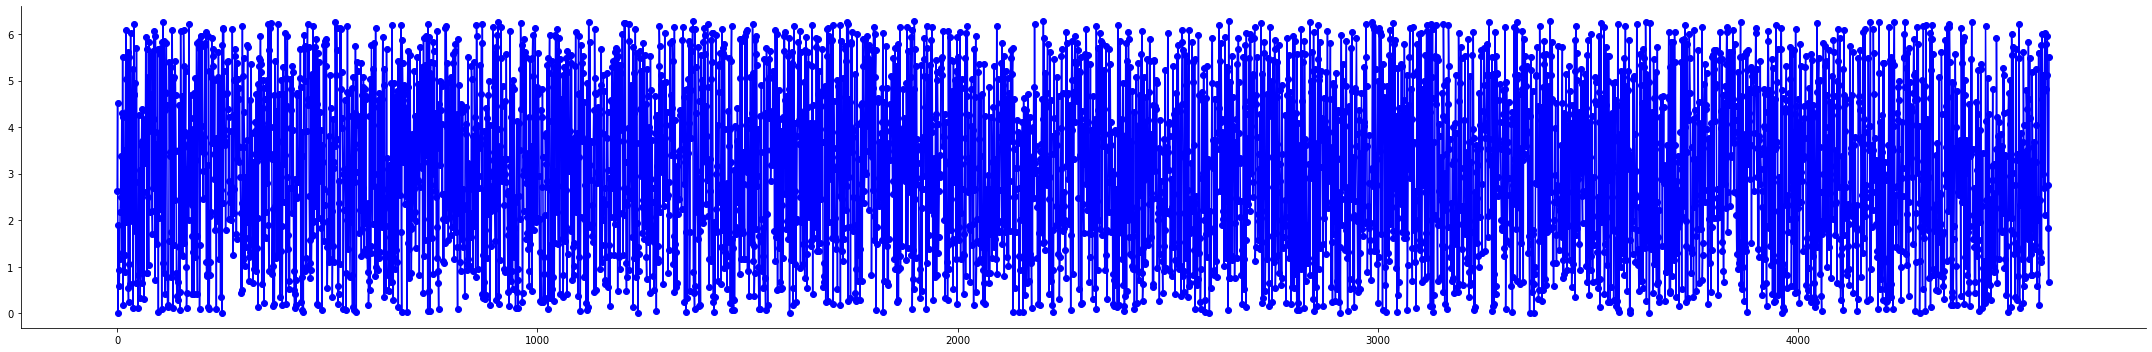

In [69]:
fig = plt.figure(figsize=(30,5))
plt.plot(dat['istim'],'-bo')

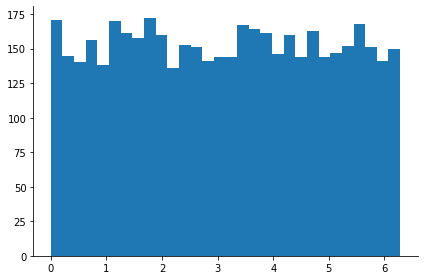

In [31]:
fig = plt.hist(dat['istim'],bins=30)

In [32]:
print(dat['xyz'].shape)
print(dat['xyz'][0][:5])

(3, 23589)
[ 448. 1080.  342.   32.  996.]


In [50]:
xc.shape

(13,)

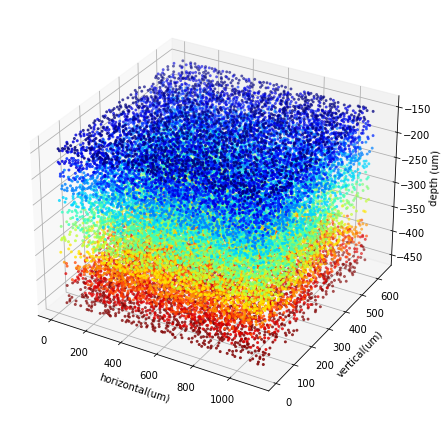

In [33]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']

zunq, iunq = np.unique(z, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

In [53]:
print(dat['sresp'][0][0],dat['sresp'][1][0])
print(dat['sresp'][:,0])

53.48326110839844 20.518503189086914
[53.48326111 20.51850319  0.         ...  0.         16.47986794
  7.97379541]


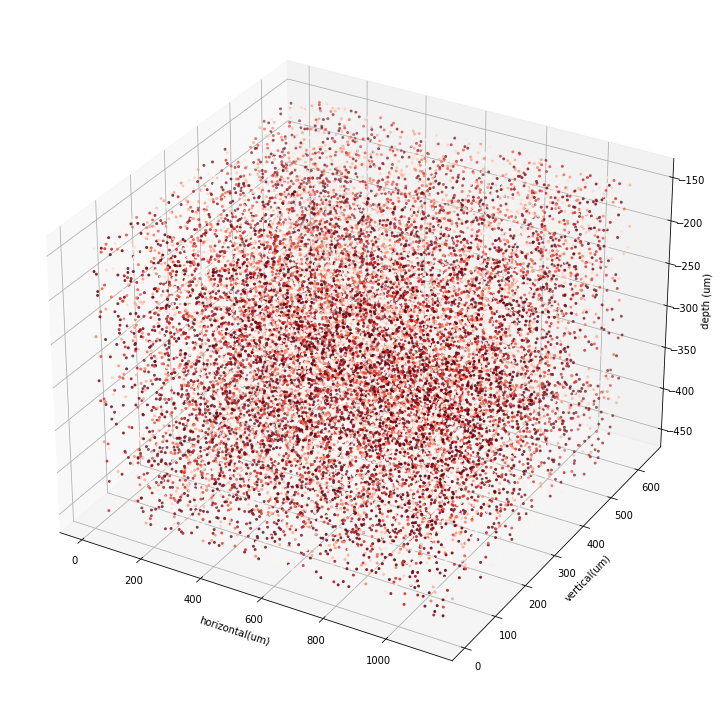

In [62]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']
intensity = dat['sresp'][:,0]
intensity[intensity>17.769683837890625] = 17.769683837890625

zunq, iunq = np.unique(intensity, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('Reds')(xc)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

In [92]:
%matplotlib qt

In [72]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']
intensity = dat['sresp'][:,1000]
intensity[intensity>17.769683837890625] = 17.769683837890625

zunq, iunq = np.unique(intensity, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('Reds')(xc)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

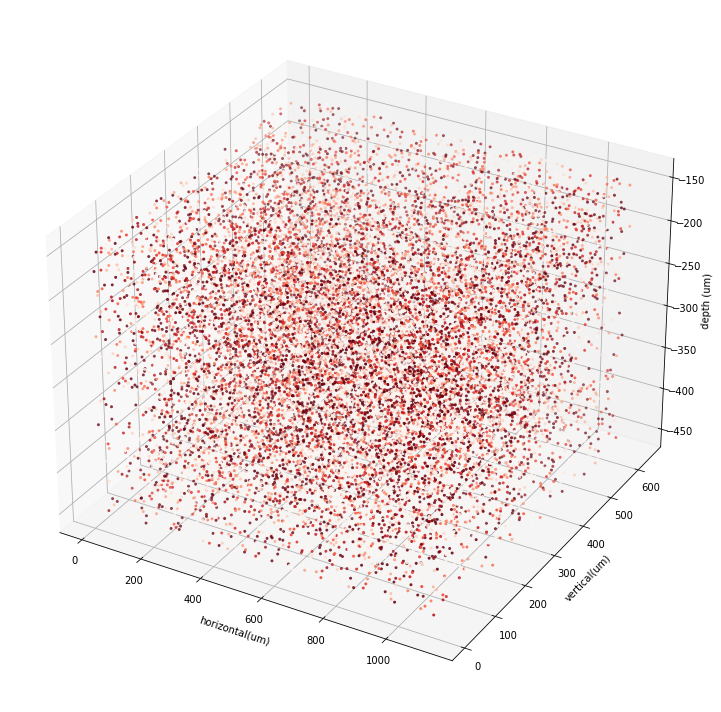

In [65]:
# @title plot the 3D positions of all neurons
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

x, y, z = dat['xyz']
intensity = dat['sresp'][:,100]
intensity[intensity>17.769683837890625] = 17.769683837890625

zunq, iunq = np.unique(intensity, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('Reds')(xc)

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons


fig = plt.figure()
plt.subplots_adjust(bottom=0.25)                
ax = fig.add_subplot(121, projection='3d')        
X= np.arange(-50,50,2)
Y=np.arange(-50,50,2)
X,Y = np.meshgrid(X,Y)

Z = np.sqrt((X**2+Y**2)/(np.tan(np.pi/120)))            
ax.plot_wireframe(X,Y,Z, rstride=3, cstride=3)         

#plt.axis('scaled')
ax.set_box_aspect([1,1,1])
h0=0
ax2 = fig.add_subplot(122, projection='3d') 
Z2 = 0*X+0*Y+h0         

l=ax2.plot_surface(X,Y,Z2,color='red',rstride=2, cstride=2)

axhauteur = plt.axes([0.2, 0.1, 0.65, 0.03])
shauteur = Slider(axhauteur, 'Hauteur', 0.5, 10.0, valinit=h0)

def update(val): 
    h = shauteur.val 
    ax2.clear()
    l=ax2.plot_surface(X,Y,0*X+0*Y+h,color='red',rstride=2, cstride=2)
    ax2.set_zlim(0,10)
    fig.canvas.draw_idle() 
shauteur.on_changed(update)
ax2.set_zlim(0,10)

plt.show()

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider, Button, RadioButtons


x, y, z = dat['xyz']
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')

ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')


axhauteur = plt.axes([0.2, 0.1, 0.65, 0.03])
shauteur = Slider(axhauteur, 'Hauteur', 1, 1000, valinit=0)

def update(val): 
    h = int(shauteur.val) 
    ax.clear()
    intensity = dat['sresp'][:,h]
    intensity[intensity>17.769683837890625] = 17.769683837890625
    zunq, iunq = np.unique(intensity, return_inverse=True)
    xc = np.linspace(0.0, 1.0, len(zunq))
    cmap = cm.get_cmap('Reds')(xc)
    
    ax.set_title('orientation : '+str(np.round(dat['istim'][h],2)))

    ax.scatter(x[::-1], y[::-1], z[::-1], 'o', s=4, c=cmap[iunq])
    fig.canvas.draw_idle() 
shauteur.on_changed(update)
ax2.set_zlim(0,10)

plt.show()

/media/cristian/Extreme SSD/Investigacion/NMA/nma_env/lib/python3.7/site-packages/ipykernel/eventloops.py:107: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  app.exec_()
